In [136]:
import pandas as pd
import matplotlib.pyplot as plt


In [137]:
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [138]:
movie_df = pd.read_csv('movies.dat',delimiter='::',names=movie,encoding='latin',engine='python')
user_df = pd.read_csv('users.dat',delimiter='::',names=user,engine='python')
rating_df = pd.read_csv('ratings.dat',delimiter='::',names=rating,engine='python')

In [139]:
for df in [movie_df,user_df,rating_df]:
    print(df.head())
    print('-----------------------------------------------------------')

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
-----------------------------------------------------------
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
-----------------------------------------------------------
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       

In [140]:
# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
Master_Data=pd.merge(pd.merge(user_df,rating_df),movie_df)

In [141]:
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [142]:
Master_Data.to_csv('F:\Data Science\MovieLens Case Study\master_data.csv',index=False,header=True)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:


In [143]:
# User Age Distribution 
Master_Data[['Age']].value_counts()

Age
25     395556
35     199003
18     183536
45      83633
50      72490
56      38780
1       27211
dtype: int64

The people of age 25 are the most likely to watch movies and give ratings, and followed by the people of age 35.

In [144]:
# User rating of the movie “Toy Story”
df1 = Master_Data[Master_Data['Title'].str.contains('Toy Story') == True]
df1.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
41626,1,F,1,10,48067,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy
41627,6,F,50,9,55117,1,4,978237008,Toy Story (1995),Animation|Children's|Comedy
41628,8,M,25,12,11413,1,4,978233496,Toy Story (1995),Animation|Children's|Comedy
41629,9,M,25,17,61614,1,5,978225952,Toy Story (1995),Animation|Children's|Comedy
41630,10,F,35,1,95370,1,5,978226474,Toy Story (1995),Animation|Children's|Comedy


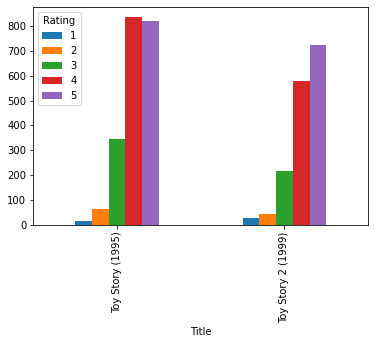

In [145]:
df1.groupby(["Title","Rating"]).size().unstack().plot(kind='bar')
plt.show()

For movie Toy Story(1995) most of the viewes gave the rating of 4, and for movie Toy Story(1999) most of the ratings are 5

In [146]:
# Top 25 movies by viewership rating
top_25 = Master_Data['Rating'].value_counts()
top_25[:25]

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

In [147]:
top_25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
top_25


Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

<AxesSubplot:xlabel='Title'>

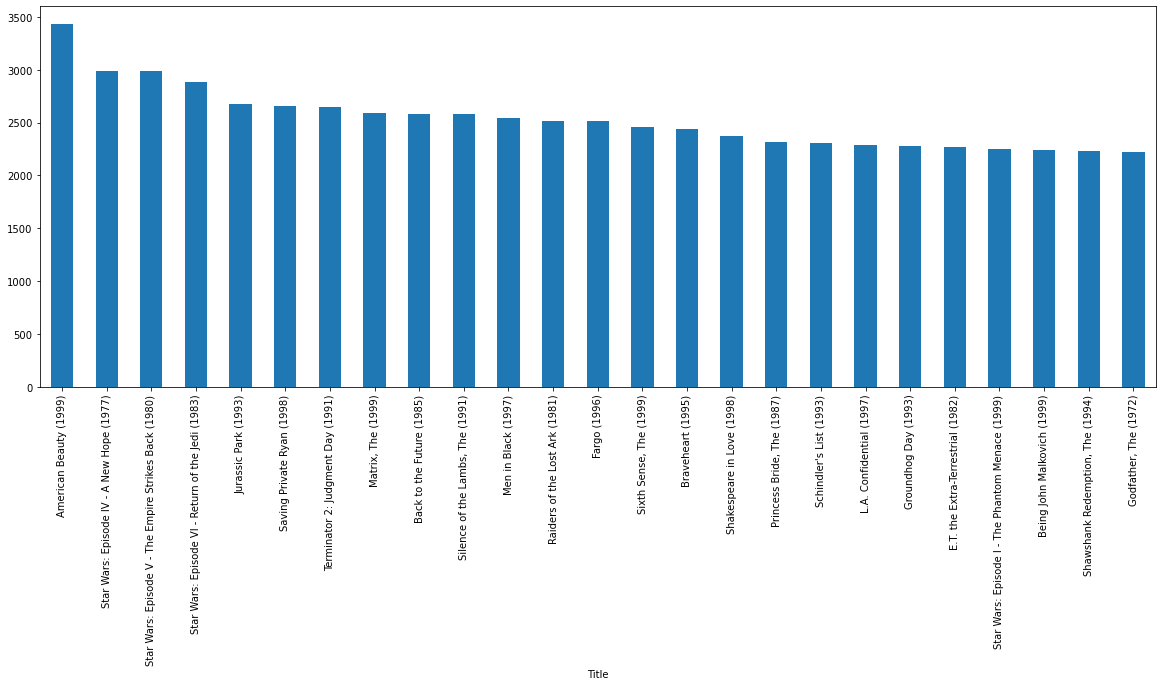

In [148]:
top_25.plot(kind='bar',figsize=(20,7))

In [149]:
# the ratings for all the movies reviewed by for a particular user of user id = 2696
df2=Master_Data[Master_Data['UserID']==2696]
df2

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
24345,2696,M,25,7,24210,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,M,25,7,24210,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,24210,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,24210,800,5,973308842,Lone Star (1996),Drama|Mystery
273633,2696,M,25,7,24210,3386,1,973308842,JFK (1991),Drama|Mystery
277808,2696,M,25,7,24210,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,M,25,7,24210,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,24210,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery
598042,2696,M,25,7,24210,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,M,25,7,24210,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller


Feature Engineering:

In [150]:
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [151]:
#all the unique genres
df3=Master_Data['Genres'].str.split("|")

In [152]:
gen = set()
for i in df3:
    gen = gen.union(set(i))

In [153]:
gen

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [154]:
# a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
One_Hot = Master_Data['Genres'].str.get_dummies("|")
One_Hot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [155]:
Master_Data = pd.concat([Master_Data,One_Hot],axis=1)
Master_Data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,...,0,0,0,0,0,0,0,0,0,1


In [156]:
# Determine the features affecting the ratings of any particular movie

<AxesSubplot:xlabel='Gender'>

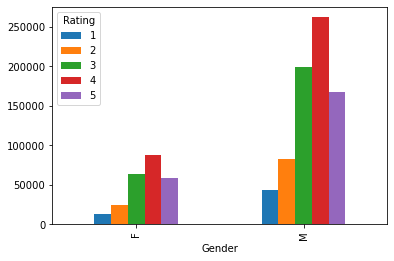

In [157]:
Master_Data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False)


<AxesSubplot:xlabel='Age'>

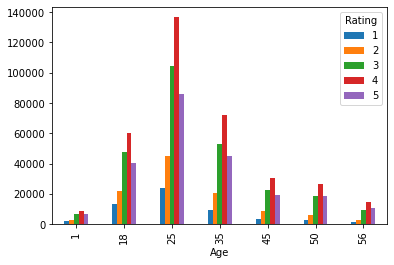

In [158]:
Master_Data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False)


<AxesSubplot:xlabel='Occupation'>

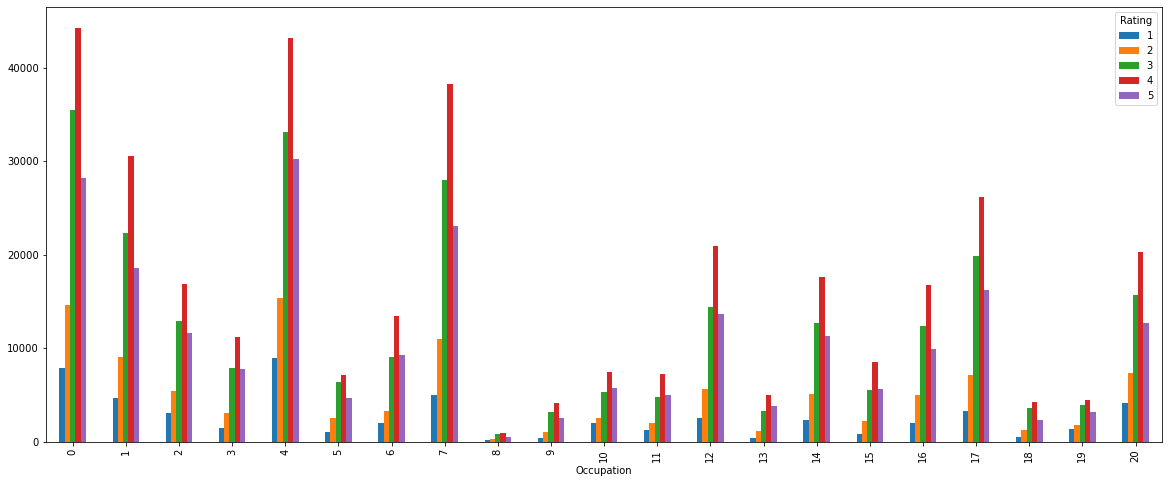

In [159]:
Master_Data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,figsize=(20,8))


In [160]:
# Developing an appropriate model to predict the movie ratings

In [161]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model

In [180]:
#First 500 extracted records
first_500 = Master_Data[:1000]


In [181]:
#Use movie id,age,occupation as features
features = first_500[['MovieID','Age','Occupation']].values

In [182]:
features

array([[1193,    1,   10],
       [1193,   56,   16],
       [1193,   25,   12],
       ...,
       [1193,   35,    4],
       [1193,   35,   20],
       [1193,   35,    3]], dtype=int64)

In [183]:
#Use rating as label
labels = first_500[['Rating']].values

In [184]:
#Use rating as label
labels

array([[5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [5],
       [5],
       [3],
       [5],
       [5],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [3],
       [2],
       [5],
       [2],
       [5],
       [2],
       [5],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [5],
       [3],
       [4],
       [5],
       [4],
       [4],
       [1],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [5],
       [5],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
    

In [185]:
#Creating train and test data set
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=42)


In [186]:
x_train

array([[1193,   35,    1],
       [1193,   50,   16],
       [1193,   25,   17],
       ...,
       [1193,   25,    6],
       [1193,   35,    1],
       [1193,   25,    3]], dtype=int64)

In [187]:
x_test

array([[1193,   35,    7],
       [1193,   25,    0],
       [1193,   25,    7],
       [1193,   25,   18],
       [1193,   50,   16],
       [1193,   50,    6],
       [1193,   56,    7],
       [1193,   50,    2],
       [1193,   35,   16],
       [1193,   35,   14],
       [1193,   25,    4],
       [1193,   56,    1],
       [1193,   50,    6],
       [1193,   18,   12],
       [1193,   35,    1],
       [1193,   35,    7],
       [1193,   45,   17],
       [1193,   35,    1],
       [1193,   25,    7],
       [1193,   56,   16],
       [1193,   25,    7],
       [1193,   18,   20],
       [1193,   35,    6],
       [1193,   25,   14],
       [1193,   18,   19],
       [1193,   35,    7],
       [1193,   50,    7],
       [1193,   56,    0],
       [1193,   25,    4],
       [1193,   18,    4],
       [1193,   45,    7],
       [1193,   25,   14],
       [1193,   45,    9],
       [1193,   45,   14],
       [1193,   25,    5],
       [1193,   18,    0],
       [1193,   25,   15],
 

In [188]:
y_train

array([[4],
       [1],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [3],
       [5],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [2],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [2],
       [3],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [3],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [5],
       [5],
       [4],
    

In [189]:
y_test

array([[4],
       [4],
       [3],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [3],
       [5],
       [5],
       [5],
       [3],
       [3],
       [5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [3],
       [4],
       [5],
       [5],
       [4],
       [3],
       [4],
       [5],
       [4],
       [5],
       [5],
       [5],
       [3],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [4],
    

In [190]:
# Linear regression Model

model=linear_model.LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
acc_lr=model.score(x_test,y_test)

In [191]:
acc_lr

-0.002028630379078633

In [192]:
# Logistic Regression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(x_train,y_train)
y_predict= lr_model.predict(x_test)

acc = lr_model.score(x_test,y_test)
acc

C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5333333333333333

In [193]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 8).fit(x_train, y_train) 

knn_predict = knn.predict(x_test) 
knn_acc = knn.score(x_test, y_test)

knn_acc


C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.48787878787878786

In [194]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
GN = GaussianNB().fit(x_train, y_train) 
GN_predict = GN.predict(x_test) 
  

GN_acc = GN.score(x_test, y_test)  
  
GN_acc

C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5333333333333333

Logistic Regression and Naive Bayes classifier model have higher accuraccy so we can say that these two models perform better.